# K-Means test tutorial
***
In this notebook, I'll try to use kMeans over a simple 2-features dataset (to plot the result), I'll eventually use and explain the Elbow and Silhouette evaluation methods.
First of all, we need to import **numpy** **matplotlib.pyplot** **pandas** and of course **kMeans**

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kMeans import kMeans as km

Now we import our dataset, thanks to Pandas this is going to be simple

In [79]:
data = pd.read_csv('./datasets/kmeans.csv')
print(data.head(4))

   ID    x1   x2
0   0  8.00  8.0
1   1  8.23  8.5
2   2  7.88  9.0
3   3  9.00  9.0


Next we convert our pandas DataFrame into a numpy array by:

In [81]:
X = data.to_numpy()
print(X)

[[  0.     8.     8.  ]
 [  1.     8.23   8.5 ]
 [  2.     7.88   9.  ]
 [  3.     9.     9.  ]
 [  4.     7.     9.  ]
 [  5.     7.5    8.25]
 [  6.    10.     7.5 ]
 [  7.     9.78   5.9 ]
 [  8.     6.5    6.5 ]
 [  9.     6.9   10.  ]
 [ 10.    11.     5.5 ]
 [ 11.    -6.    -8.  ]
 [ 13.    -6.23  -8.5 ]
 [ 14.    -5.88  -9.  ]
 [ 15.    -7.    -9.  ]
 [ 16.    -5.    -9.  ]
 [ 17.    -5.5   -8.25]
 [ 18.    -8.    -7.5 ]
 [ 19.    -7.78  -5.9 ]
 [ 20.    -4.5   -6.5 ]
 [ 21.    -4.9  -10.  ]
 [ 22.    -9.    -5.5 ]
 [ 23.    -6.     8.  ]
 [ 24.    -6.23   8.5 ]
 [ 25.    -5.88   9.  ]
 [ 26.    -7.     9.  ]
 [ 27.    -5.     9.  ]
 [ 28.    -5.5    8.25]
 [ 29.    -8.     7.5 ]
 [ 30.    -7.78   5.9 ]
 [ 31.    -4.5    6.5 ]
 [ 32.    -4.9   10.  ]
 [ 33.    -9.     5.5 ]
 [ 34.     4.5  -11.5 ]
 [ 35.     4.73 -12.  ]
 [ 36.     4.38 -12.5 ]
 [ 37.     5.5  -12.5 ]
 [ 38.     3.5  -12.5 ]
 [ 39.     4.   -11.75]
 [ 40.     6.5  -11.  ]
 [ 41.     6.28  -9.4 ]
 [ 42.     3.   

##### Let's try now to visualize the data and get insights about the number of clusters:
remark that the first column represent the sample key (ID) and the 2nd and 3rd column are the features of out training set, we'll name X1 and X2 the first and second respectively

In [82]:
X1 = X[:, 1]
X2 = X[:, 2]
print('_______________________________________________________________________________')
print('Feature1: ')
print(X1)
print('_______________________________________________________________________________')
print('Feature2:')
print(X2)

_______________________________________________________________________________
Feature1: 
[ 8.    8.23  7.88  9.    7.    7.5  10.    9.78  6.5   6.9  11.   -6.
 -6.23 -5.88 -7.   -5.   -5.5  -8.   -7.78 -4.5  -4.9  -9.   -6.   -6.23
 -5.88 -7.   -5.   -5.5  -8.   -7.78 -4.5  -4.9  -9.    4.5   4.73  4.38
  5.5   3.5   4.    6.5   6.28  3.    3.4   7.5  -5.   -4.   -2.5   5.
  4.    3.5   7.    5.  ]
_______________________________________________________________________________
Feature2:
[  8.     8.5    9.     9.     9.     8.25   7.5    5.9    6.5   10.
   5.5   -8.    -8.5   -9.    -9.    -9.    -8.25  -7.5   -5.9   -6.5
 -10.    -5.5    8.     8.5    9.     9.     9.     8.25   7.5    5.9
   6.5   10.     5.5  -11.5  -12.   -12.5  -12.5  -12.5  -11.75 -11.
  -9.4  -10.   -13.5   -9.     0.    -2.21  -0.99   0.     3.9    2.35
   3.    10.12]


***
Then and thanks to pyplot, we'll plot the two Features in 2D Space:

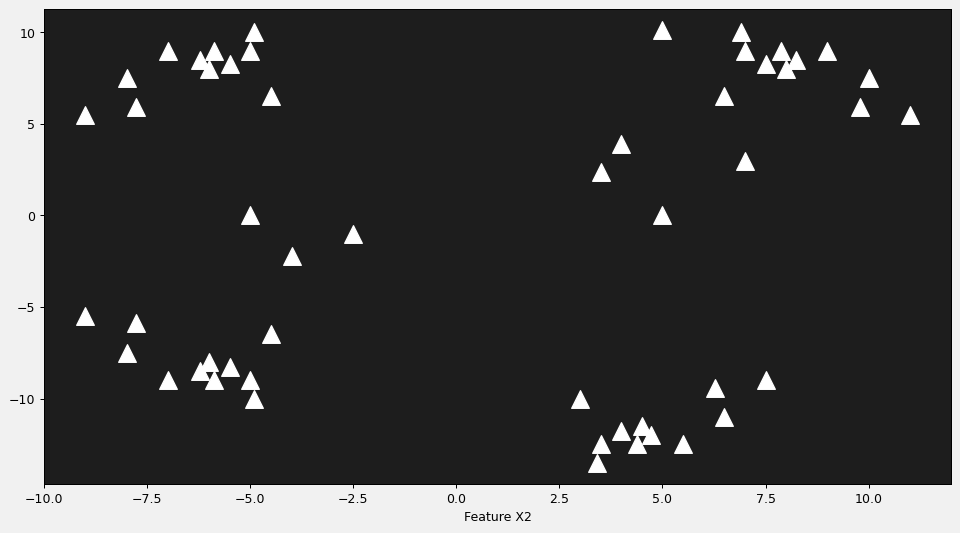

In [117]:
plt.figure(figsize=(13, 7), dpi=90, edgecolor='b', facecolor='#f1f1f1')
ax = plt.gca()
ax.set_facecolor('#1d1d1d')
ax.scatter(X1, X2, s=200, marker='^', c='w')

plt.xlabel('Feature X1')
plt.xlabel('Feature X2')

plt.show()

As we can see, 4 clusters would be a fair choice, now we'll apply k-means algorithm over the dataset:

In [84]:
X = X[:, 1:] # cut out the first columnt (contains IDs)

# let's create a kMeans object and fit X
model = km().fit(X, tol=0, verbose=1, n_clusters=4) # with verbose we can see the training progression

iteration  0  current_variation=  32.427648542057575  ex_variation=  inf
iteration  1  current_variation=  32.427648542057575  ex_variation=  32.427648542057575


now let's get our clustered subsets and centroids

In [85]:
clusters = model.get_clusters() # get list of clusters (np arrays)
centroids = model.centroids # get list of centroids' coords (list of np arrays)
print(centroids)

[[  4.84454545 -11.42272727]
 [  7.268125     6.6575    ]
 [ -5.80642857  -6.45357143]
 [ -6.34454545   7.92272727]]


Now let's plot our 4 subsets with different shapes & colors to see how well did k-means performed

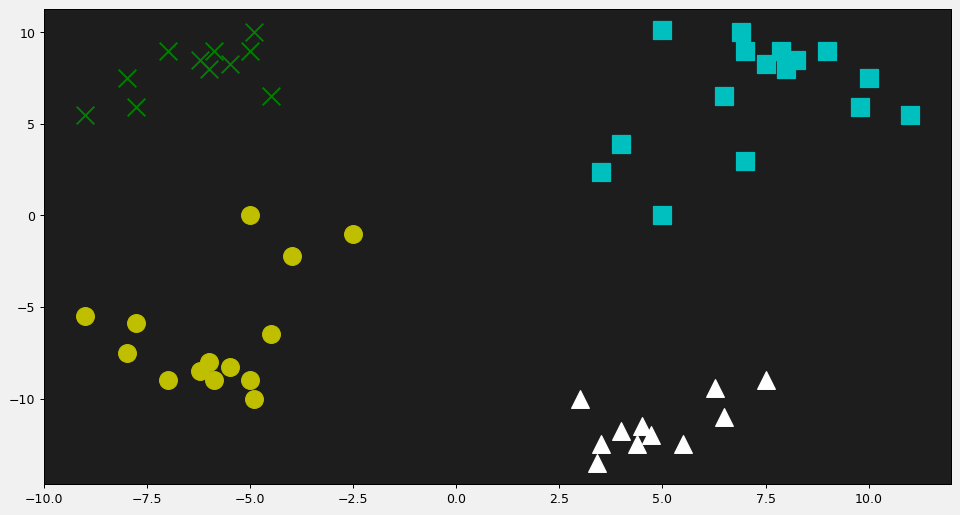

In [112]:
clust0 = clusters[0] # fisrt cluster
clust1 = clusters[1] # 2nd 
clust2 = clusters[2] # 3rd
clust3 = clusters[3] # 4th

plt.figure(figsize=(13, 7), dpi=90, edgecolor='b', facecolor='#f1f1f1') # creates a new figure to plot
ax_ = plt.gca()
ax_.set_facecolor('#1d1d1d')

ax_.scatter(clust0[:, 0], clust0[:, 1], s=200, marker='^', c='w') # plot 1st cluster with white triangles
ax_.scatter(clust1[:, 0], clust1[:, 1], s=200, marker='s', c='c') # plot 2nd with cyan squares
ax_.scatter(clust2[:, 0], clust2[:, 1], s=200, marker='o', c='y') # plot 3rd with yellow circles 
ax_.scatter(clust3[:, 0], clust3[:, 1], s=200, marker='x', c='g') # plor 4th with green crosses

plt.show() # show the plot

As we can see, K-Means has performed well! that's mainly due to the small amount of data and the low dimension (2 features only), add the fact we already knew the number of clusters from the beginning. K-Means is susceptible to local minimum and different centroids initializations can lead to different clustering, in the next section we'll see some evaluation methods which can help when trying to set the number of clusters.

## The Elbow's Methods
***

It simply consist of trying different successive number of clusters and choose the one from where the variation starts to decrease slowly (plotting may help recognize it):

In [95]:
elbow_clusters = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
elbow_vars = np.zeros((10, )) # variations

for i, clust in enumerate(elbow_clusters):
    elbow_vars[i] = km().fit(X, n_clusters=clust, verbose=0, tol=0).var_ # fit and return the variation
    print('for ', clust, ' number of cluster, the variation is: ', elbow_vars[i])

for  2  number of cluster, the variation is:  148.89071175725653
for  3  number of cluster, the variation is:  65.38360091721133
for  4  number of cluster, the variation is:  32.427648542057575
for  5  number of cluster, the variation is:  25.72255966160181
for  6  number of cluster, the variation is:  24.515135014563242
for  7  number of cluster, the variation is:  23.307710367524674
for  8  number of cluster, the variation is:  22.10028572048611
for  9  number of cluster, the variation is:  19.158832280188246
for  10  number of cluster, the variation is:  18.908780647038565
for  11  number of cluster, the variation is:  18.372872563705233


#### Now we plot the Elbow's curve and spot the right number of clusters !

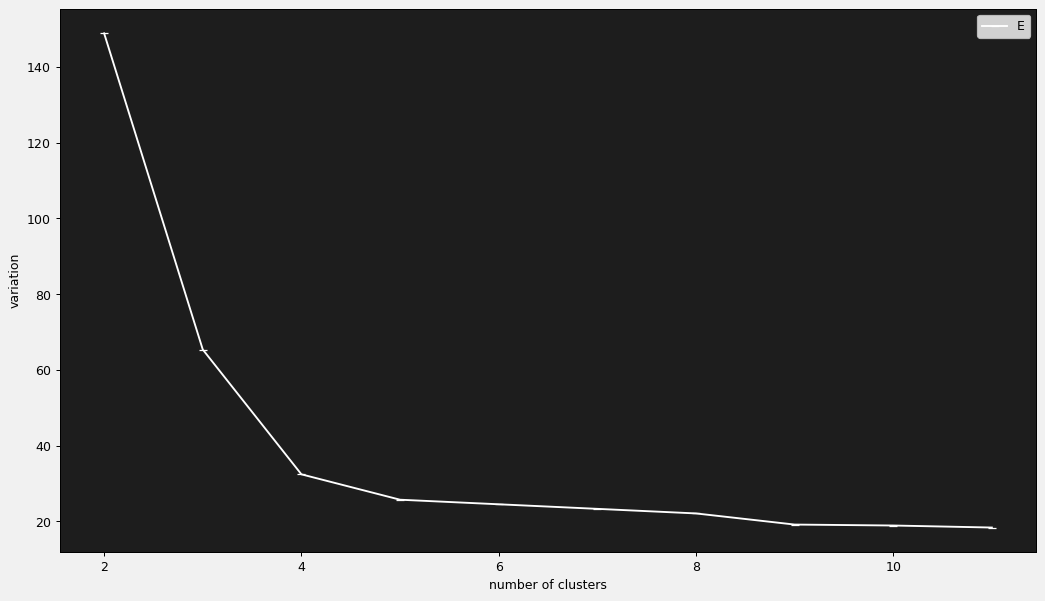

In [113]:
plt.figure(figsize=(14, 8), dpi=90, facecolor='#f1f1f1')
ax3 = plt.gca()
ax3.set_facecolor('#1d1d1d')
plt.plot(elbow_clusters, elbow_vars, marker='_', c='w')
plt.legend("Elbow's curve" )
plt.xlabel('number of clusters')
plt.ylabel('variation')
plt.show()